### 2026.01.14

### 비지도 학습

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [ ]:
# 학습용 테스트 데이터 셋 생
X, y = make_blobs(
    n_samples=300,
    centers=4,
    random_state=42
)

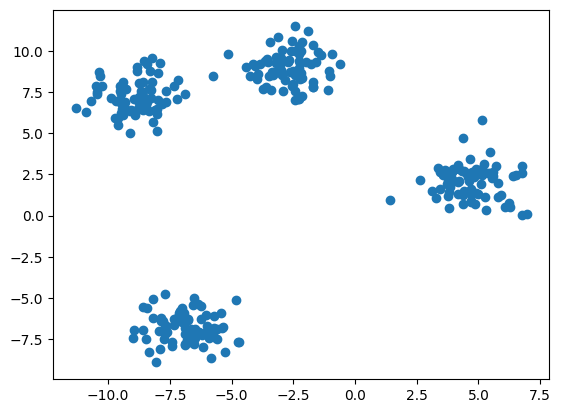

In [22]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()


In [23]:
# 모델 갹체 생성
kmeans = KMeans(n_clusters = 3, random_state = 42)

In [24]:
# 학습 -> 데이터 검증

cluster_labels = kmeans.fit_predict(X)

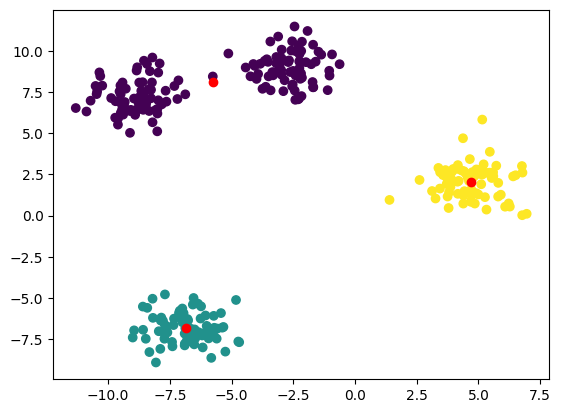

In [25]:
# 군집화 된 데이터의 시각화

plt.scatter(X[:, 0], X[:, 1], c = cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'red')

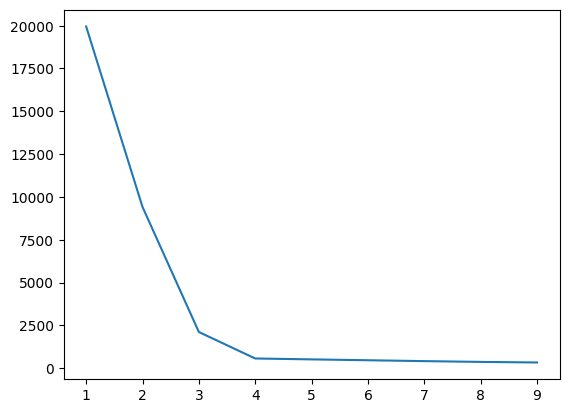

In [ ]:
result = []

for k in range(1, 10):
    kmeans_temp = KMeans(n_clusters = k, random_state=42)
    kmeans_temp.fit_predict(X)
    result.append(kmeans_temp.inertia_)

plt.plot(range(1,10), result)

# 4 최

In [33]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [32]:
sil_avg = silhouette_score(X, cluster_labels)
print(sil_avg)

0.7569108532473462


In [34]:
sil_values = silhouette_samples(X, cluster_labels)
print(sil_values)

[0.6829029  0.6839847  0.47249907 0.88879656 0.5942044  0.90063471
 0.89427701 0.90827138 0.6414141  0.837711   0.61576512 0.8857003
 0.49185786 0.68285687 0.69016166 0.65264991 0.65767635 0.77592818
 0.59774846 0.53201718 0.86504489 0.622809   0.89582869 0.72010828
 0.63472903 0.7355566  0.71810937 0.81536972 0.90242032 0.85478196
 0.66237242 0.85193517 0.7168619  0.86485193 0.67940344 0.58138544
 0.71240392 0.91169984 0.68619782 0.83789227 0.86407233 0.58513782
 0.69919847 0.88197373 0.57183823 0.56588573 0.71784814 0.88735582
 0.72752549 0.8392963  0.90894542 0.72735497 0.8980895  0.42299809
 0.88514061 0.64638535 0.72847702 0.87951354 0.88724584 0.63161347
 0.73875379 0.79648492 0.88300296 0.72473706 0.89432168 0.89628474
 0.90672225 0.88313919 0.86793568 0.67076186 0.87870933 0.84510454
 0.70680872 0.89399568 0.58539311 0.73606122 0.84918397 0.90588808
 0.64735197 0.88348048 0.67040853 0.60911783 0.70504784 0.57915689
 0.8919131  0.7014962  0.74219057 0.84068471 0.84650114 0.82157

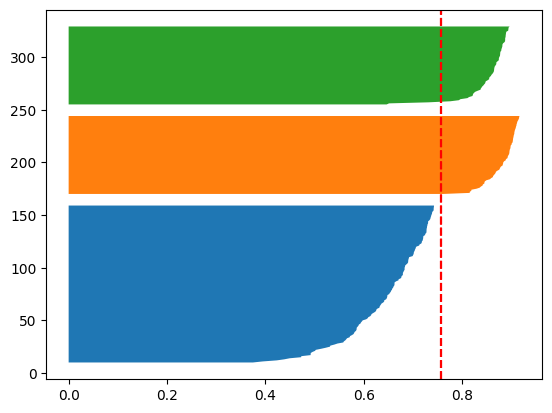

In [38]:
y_lower = 10

for i in range(3):
    ith_cluster_silhouette_value = sil_values[cluster_labels == i]
    ith_cluster_silhouette_value.sort()
    size_clust_i = ith_cluster_silhouette_value.shape[0]
    y_upper = y_lower + size_clust_i

    # 차트 그리기
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_value)

    # 다음 y_lower 값 계산
    y_lower = y_upper + 10

    plt.axvline(x = sil_avg, color = 'red', linestyle = '--')


### PCA

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [40]:
iris = load_iris()
X = iris.data # 특성 데이터 (4차원)
y = iris.target # 타깃 데이터 (0, 1, 2의 세 가지 클래스)

In [42]:
# 2. 데이터 정규화 (평균=0, 표준편차=1로 변환)
# - PCA는 데이터의 스케일에 민감하므로 정규화가 필수
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
pca = PCA(n_components=2) # 2개의 주성분으로 축소
X_pca = pca.fit_transform(X_scaled)

In [44]:
# - 각 주성분이 데이터의 분산을 얼마나 설명하는지 출력
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.72962445 0.22850762]


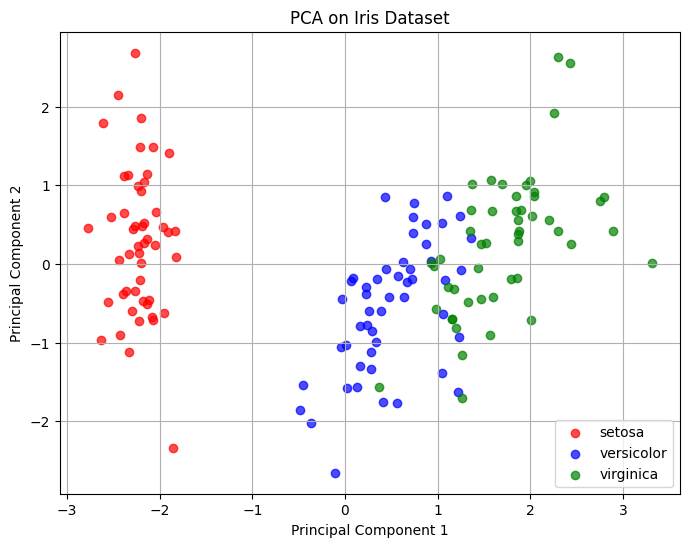

In [46]:
# 5. PCA 결과 시각화
# - 두 개의 주성분을 사용해 데이터를 2D 플롯으로 시각화
plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1, 2], ['red', 'blue', 'green'],iris.target_names):
    plt.scatter(X_pca[y == target, 0], # 첫 번째 주성분
    X_pca[y == target, 1], # 두 번째 주성분
    color=color, label=label, alpha=0.7)

plt.title('PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()